In [1]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
from utils import *
set_seed(42)
from tqdm import tqdm
%pip install torchsummary
from torchsummary import summary

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

c:\Users\shash\anaconda3\lib\site-packages\torch_lr_finder\lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
c:\Users\shash\anaconda3\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


Device Selected: cuda
Note: you may need to restart the kernel to use updated packages.


In [2]:
from Dataset import CIFAR10
batch_size = 512
cifar10 = CIFAR10(batch_size)

In [3]:
from models.CustomResNet import CustomResNet
from utils.runner import Runner
model = CustomResNet(cifar10)
exp = Runner(model, precision=16)

c:\Users\shash\anaconda3\lib\site-packages\lightning_fabric\connector.py:554: UserWarning: 16 is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
  rank_zero_warn(
Using 16bit Automatic Mixed Precision (AMP)
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\shash\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorb

Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Files already downloaded and verified


  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.76E-04


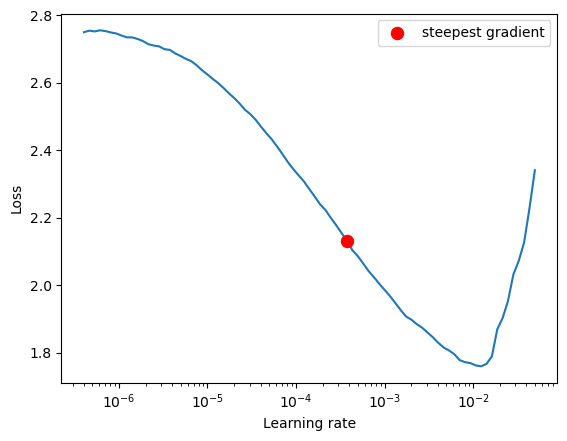


   | Name                                    | Type             | Params
------------------------------------------------------------------------------
0  | layer_output                            | Sequential       | 6.6 M 
1  | layer_output.0                          | CustomLayer      | 1.9 K 
2  | layer_output.0.pool_block               | ConvLayer        | 1.9 K 
3  | layer_output.0.pool_block.all_layers    | Sequential       | 1.9 K 
4  | layer_output.0.pool_block.all_layers.0  | Conv2d           | 1.7 K 
5  | layer_output.0.pool_block.all_layers.1  | BatchNorm2d      | 128   
6  | layer_output.0.pool_block.all_layers.2  | ReLU             | 0     
7  | layer_output.0.pool_block.all_layers.3  | Dropout          | 0     
8  | layer_output.1                          | CustomLayer      | 369 K 
9  | layer_output.1.pool_block               | ConvLayer        | 74.0 K
10 | layer_output.1.pool_block.all_layers    | Sequential       | 74.0 K
11 | layer_output.1.pool_block.all_layers.0 

Sanity Checking: 0it [00:00, ?it/s]

Files already downloaded and verified


c:\Users\shash\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:42: UserWarning: Encounted `nan` values in tensor. Will be removed.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch: 1, Validation_Loss: nan, Validation_Accuracy: 10.55


c:\Users\shash\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:42: UserWarning: The ``compute`` method of metric MeanMetric was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)  # noqa: B028
c:\Users\shash\anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:42: UserWarning: The ``compute`` method of metric Acc_Metric was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)  # noqa: B028


Training: 0it [00:00, ?it/s]

c:\Users\shash\anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Validation: 0it [00:00, ?it/s]

Epoch: 1, Validation_Loss: nan, Validation_Accuracy: 10.00
Epoch: 1, Training_Loss: nan, Training_Accuracy: 10.00


c:\Users\shash\anaconda3\lib\site-packages\pytorch_lightning\trainer\call.py:52: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000020F271B2820>
Traceback (most recent call last):
  File "c:\Users\shash\anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "c:\Users\shash\anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 1436, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


In [4]:
exp.run()